In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


In [2]:
df= pd.read_csv('data/TrainAndValid.csv',low_memory=False)
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:ylabel='Frequency'>

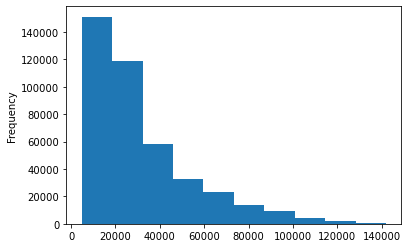

In [4]:
df.SalePrice.plot.hist()

In [40]:
df_temp= df.copy()

Parsing date time columns

In [42]:
df_temp.saledate = pd.to_datetime(df_temp.saledate, infer_datetime_format=True)

In [48]:
df_temp.sort_values(by=['saledate'],inplace = True)

In [49]:
df_temp.saledate[:10]

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [50]:
# sort the data based on date time ..when working with times series data 
df_temp.to_csv('data/processed_date_time.csv',index=False)

In [52]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [53]:
df_temp['saleyear'] = df_temp.saledate.dt.year
df_temp['salemonth'] = df_temp.saledate.dt.month
df_temp['saleday'] = df_temp.saledate.dt.day
df_temp['weekday'] = df_temp.saledate.dt.weekday
df_temp['dayofyear'] = df_temp.saledate.dt.dayofyear

In [54]:
df_temp.drop(['saledate'], axis= 1,inplace = True)


In [61]:
df_temp.to_csv('data/processed_date_time.csv',index=False)
df_temp.T

,205615,233186,142491,115536,92301,115892,134080,92294,31494,140922,...,407382,405913,405915,411423,412544,409901,405777,411889,411890,409203
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,6267915,6257872,6257884,6309986,6327732,6286556,6256957,6312472,6312473,6283635
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,47000.0,13000.0,16500.0,16000.0,11000.0,23000.0,11500.0,11000.0,11000.0,34000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1844076,1837259,1897564,1899882,1906978,1793587,1860454,1820676,1796787,1869284
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,3362,3218,3263,9508,12524,4605,6868,17231,17231,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1977,1995,1996,2005,2006,2006,1000,2006,2006,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416,966C,D4H,416,W20,D7G,...,140G,721B,921B,331,TB135,310G,9050,323,323,544H


In [56]:
# checking different column values
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [ ]:
#handle missing data and need to convert to numeric data  

In [57]:
# find the columns with strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
    


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


check pandas datatypes available : https://pandas.pydata.org/docs/reference/arrays.html


In [58]:
# coverting strings in the data set to categories
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [59]:
#checking the dtype for the string columns
df_temp.state.cat.codes
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [12]:
df_temp.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [60]:
# now to fill the missing values:
df_temp.isnull().sum()/len(df_temp)



SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [62]:
#saving the data for usage later:
df_temp.to_csv('data/processed_categoricals.csv',index=False)

In [63]:
df_temp = pd.read_csv('data/processed_categoricals.csv',low_memory=False)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

# Fill missing values 

In [64]:
# find all the numeric columns in the data set
# finding the numeric coulumns:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
weekday
dayofyear


In [65]:
#find numeric columns with missing values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


auctioneerID
MachineHoursCurrentMeter


In [66]:
# fill the missing numeric values with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+'_is_missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [67]:
#check the data for missing numeric values : 
df_temp.isnull().sum()/len(df_temp)

SalesID                                0.000000
SalePrice                              0.000000
MachineID                              0.000000
ModelID                                0.000000
datasource                             0.000000
auctioneerID                           0.000000
YearMade                               0.000000
MachineHoursCurrentMeter               0.000000
UsageBand                              0.821492
fiModelDesc                            0.000000
fiBaseModel                            0.000000
fiSecondaryDesc                        0.340993
fiModelSeries                          0.857845
fiModelDescriptor                      0.818715
ProductSize                            0.524851
fiProductClassDesc                     0.000000
state                                  0.000000
ProductGroup                           0.000000
ProductGroupDesc                       0.000000
Drive_System                           0.740520
Enclosure                              0

In [19]:
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [20]:
df_temp.MachineHoursCurrentMeter_is_missing.value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

In [117]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           412698 non-null  int64  
 1   SalesID                              412698 non-null  int64  
 2   SalePrice                            412698 non-null  float64
 3   MachineID                            412698 non-null  int64  
 4   ModelID                              412698 non-null  int64  
 5   datasource                           412698 non-null  int64  
 6   auctioneerID                         412698 non-null  float64
 7   YearMade                             412698 non-null  int64  
 8   MachineHoursCurrentMeter             412698 non-null  float64
 9   UsageBand                            73670 non-null   object 
 10  fiModelDesc                          412698 non-null  object 
 11  fiBaseModel  

In [68]:
# fill the categorical data values:
# we do a +1 since nan values in categorical.code is converted to -1
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+'_is_missing'] = pd.isnull(content)
        df_temp[label] =pd.Categorical(content).codes + 1 

In [69]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [4]:
df_temp.saleyear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleyear, Length: 412698, dtype: int64

### Now since every data is filled and there is no missing values and everything is numerical we can use ML models

In [7]:
df_temp.T [:52]

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,6267915,6257872,6257884,6309986,6327732,6286556,6256957,6312472,6312473,6283635
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,47000.0,13000.0,16500.0,16000.0,11000.0,23000.0,11500.0,11000.0,11000.0,34000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1844076,1837259,1897564,1899882,1906978,1793587,1860454,1820676,1796787,1869284
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,3362,3218,3263,9508,12524,4605,6868,17231,17231,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1977,1995,1996,2005,2006,2006,1000,2006,2006,1000
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fiModelDesc,4593,4772,2347,1767,744,1767,2178,744,4741,2348,...,107,1330,1706,613,4550,500,1679,581,581,989


In [5]:
#split data into training and validation
df_val = df_temp[df_temp.saleyear == 2012]
df_train = df_temp[df_temp.saleyear != 2012]
df_val.shape,df_train.shape

((11573, 103), (401125, 103))

In [6]:
x_train,y_train = df_train.drop('SalePrice',axis =1),df_train.SalePrice
x_train.shape,y_train.shape

((401125, 102), (401125,))

In [7]:
x_valid,y_valid = df_val.drop('SalePrice',axis =1),df_val.SalePrice
x_valid.shape,y_valid.shape

((11573, 102), (11573,))

In [10]:
## Modelling , model driven EDA

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestRegressor



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [11]:
## building an evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates the root mean squared log error between true labels and predicitons
    
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create funtion to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training_MAE":mean_absolute_error(y_train,train_preds),
              "Valid_MAE":mean_absolute_error(y_valid,val_preds),
              "Training_RMSLE":rmsle(y_train,train_preds),
              "Valid_RMSLE":rmsle(y_valid,val_preds),
              "Training_R^2":r2_score(y_train,train_preds),
              "Valid_R^2":r2_score(y_valid,val_preds)}
    return scores



In [13]:
#%%time

#model = RandomForestRegressor(n_jobs=-1,random_state=42,verbose = 2)
#model.fit(x_train, y_train)
#model.score(x_valid,y_valid)

In [15]:
%%time
#cutting down max number of samples each tree could use
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(x_train,y_train)

CPU times: total: 23.2 s
Wall time: 6.11 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [16]:
show_scores(model)

{'Training_MAE': 5606.001235618533,
 'Valid_MAE': 7224.702594341074,
 'Training_RMSLE': 0.26128573153811235,
 'Valid_RMSLE': 0.2960815980236268,
 'Training_R^2': 0.8586628730960844,
 'Valid_R^2': 0.8297889961377773}

In [15]:
%%time
## Hyper parameter tuning with randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_samples":[15000]
           }
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                             param_distributions=rf_grid,
                             n_iter=10,
                             cv=5,
                             verbose=True,
                             random_state=42)
#Fit the RandomizedSearchCV
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 6min 59s
Wall time: 2min 32s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [15000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [16]:
# find he best hyperparameters using randomized search cv
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_samples': 15000,
 'max_depth': None}

In [17]:
show_scores(rs_model)

{'Training_MAE': 5915.428062925435,
 'Valid_MAE': 7490.497776369429,
 'Training_RMSLE': 0.27191461760768637,
 'Valid_RMSLE': 0.30095588380605814,
 'Training_R^2': 0.8397523421904242,
 'Valid_R^2': 0.8089135620235921}

In [18]:
%%time
# this data is from the internet for tuning this particular dataset  after using 100 iterations
ideal_model = RandomForestRegressor(n_estimators=40,
                                    n_jobs=-1,
                                    min_samples_split=14,
                                    min_samples_leaf=1,
                                    max_features=10,
                                    random_state=42)
ideal_model.fit(x_train,y_train)

CPU times: total: 1min 16s
Wall time: 15 s


RandomForestRegressor(max_features=10, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [20]:
show_scores(ideal_model)

{'Training_MAE': 2733.688625158782,
 'Valid_MAE': 6061.373183732201,
 'Training_RMSLE': 0.13617133371962867,
 'Valid_RMSLE': 0.2502172324297705,
 'Training_R^2': 0.9639641827815584,
 'Valid_R^2': 0.8775427609173954}

In [22]:
# loaing the test data into dataframe
df = pd.read_csv('data/Test.csv',low_memory=False)


In [23]:
# test data needs to be preprocessed for making predictions
def preprocessor(df):
    df.saledate = pd.to_datetime(df.saledate, infer_datetime_format=True)
    df.sort_values(by=['saledate'],inplace = True)
    df['saleyear'] = df.saledate.dt.year
    df['salemonth'] = df.saledate.dt.month
    df['saleday'] = df.saledate.dt.day
    df['weekday'] = df.saledate.dt.weekday
    df['dayofyear'] = df.saledate.dt.dayofyear
    df.drop(['saledate'], axis= 1,inplace = True)
    #fill missing numerical values
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    # fill the categorical data values:
    # we do a +1 since nan values in categorical.code is converted to -1
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            df[label] =pd.Categorical(content).codes + 1
    return df

In [24]:
# preprocessing the data
df = preprocessor(df)
df.shape

(12457, 101)

check for the missing columns since the shape does'nt match

In [25]:
set(x_train.columns)-set(df.columns)

{'auctioneerID_is_missing'}

In [26]:
df['auctioneerID_is_missing'] = False

In [27]:
df.shape

(12457, 102)

In [28]:
# make predictions on the data set
test_pred=ideal_model.predict(df)
test_pred

C:\Users\DasAn\Desktop\bulldozer_project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([16038.25145341, 20448.55776168, 22942.08413115, ...,
       35650.75407232, 40346.33061383, 28000.58524809])

In [31]:
count=0
for keys in x_train.columns:
    count= count+1
    if keys=='auctioneerID_is_missing':
        break
print(count)
    

57


In [34]:
x_train.iloc[:,56]
# we can now use this iloc to verify the column name and its index and reinsert the column to a particluar column position using 'DataFrame.insert' command

0         False
1         False
2         False
3         False
4         False
          ...  
401120    False
401121    False
401122    False
401123    False
401124    False
Name: auctioneerID_is_missing, Length: 401125, dtype: bool

In [35]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([2.53431617e-02, 3.16970312e-02, 4.14298208e-02, 3.83754417e-03,
       5.27271941e-03, 1.57957264e-01, 5.12539585e-03, 2.35981607e-03,
       4.32549825e-02, 4.09521500e-02, 6.97497011e-02, 6.58743959e-03,
       3.15753372e-02, 6.47091830e-02, 5.56989212e-02, 9.12532015e-03,
       3.81143493e-03, 1.41847708e-02, 3.31738160e-03, 4.76922715e-02,
       8.01959537e-03, 2.25135704e-03, 4.18687159e-03, 2.81902095e-04,
       2.03809710e-03, 6.43075431e-05, 2.23736687e-03, 4.30819175e-03,
       1.25912164e-03, 3.12371023e-03, 8.94561856e-03, 3.81976613e-03,
       4.56379184e-03, 4.80259571e-03, 5.44472417e-04, 1.07371471e-02,
       1.95514293e-03, 1.74104466e-02, 2.91520095e-03, 4.91619918e-03,
       2.84592874e-03, 1.58785424e-03, 3.62315160e-03, 7.87666776e-04,
       1.05128103e-03, 5.12546970e-04, 1.17778142e-03, 5.30981979e-03,
       2.42345136e-03, 3.82707107e-04, 6.18688805e-04, 7.05824604e-02,
       5.41226368e-03, 9.16254399e-03, 4.79422658e-03, 1.28929982e-02,
      

In [76]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    plot_df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    plt.figure(figsize=(10,5)) 
    sns.barplot(x="feature_importance",
                y="features",
                data=plot_df[:n],
                orient="h")
    #
   

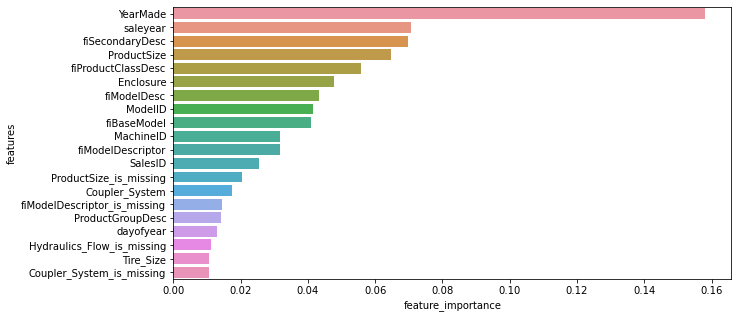

In [77]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [50]:
df.T[:52]

,1408,1023,1728,1167,1594,1732,1445,1242,1446,1179,...,9951,10693,12305,10716,11643,9941,9936,11620,9995,9803
SalesID,4317459,4249784,4392603,4274831,4362801,4393021,4320212,4290711,4320575,4277375,...,6620694,6626954,6640227,6627090,6635304,6620191,6620142,6635116,6621460,6469532
MachineID,2295526,1745722,2283116,2288988,2300591,2280264,2272145,2306563,2300476,2290729,...,2300578,326064,2555080,116532,1477779,2272921,2297127,1412453,2554811,2522919
ModelID,8132,3178,18111,3783,16490,18164,4605,3824,4605,3560,...,20090,23162,22805,1130,248,9518,9579,2160,13316,5864
datasource,172,172,172,172,172,172,172,172,172,172,...,172,149,149,149,149,172,172,149,149,121
auctioneerID,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
YearMade,1998,1995,2004,2001,2006,2003,2002,2002,2004,1996,...,2006,2001,2006,2006,2000,2005,2008,2002,2003,1998
MachineHoursCurrentMeter,4359.0,4489.0,2126.0,9115.0,885.0,0.0,4085.0,9754.0,3642.0,10581.0,...,3525.0,3525.0,3525.0,3525.0,3525.0,3525.0,3525.0,3525.0,3525.0,3525.0
UsageBand,3,2,2,3,2,0,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
fiModelDesc,397,509,906,824,1513,1186,223,844,223,381,...,1769,233,1177,241,1064,423,1675,1722,936,1377
fiBaseModel,148,180,320,290,610,408,95,296,95,142,...,742,97,404,100,373,154,676,702,341,534
